<a href="https://colab.research.google.com/github/christianzambra/productmanagerslife/blob/main/Regressao_e_DesvioPadrao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------

#Os comandos abaixo importam as bibliotecas que serão utilizadas aqui.
#caso algum comando falhe pela biblioteca não ter sido instalada, click no link pypi e instale.


#NumPy - Biblioteca científica, muito útil para calculos mais complexos
# https://numpy.org/
#https://pypi.org/project/numpy/
import numpy as np

#Pandas - Biblioteca extremamente útil para a manipulação de tabelas e bases de dados
#https://pandas.pydata.org/
#https://pypi.org/project/pandas/
import pandas as pd

#MatPlotLib - Ferramenta de visualização de dados em python
#https://matplotlib.org/
import matplotlib.pyplot as plt

#Yahoo Finance - Uma das ferramentas mais simples e acessíveis, para acesso a contações de ativos negociados em bolsa de valores
#https://pypi.org/project/yfinance/
import yfinance as yf

#import pandas_datareader as pdr
#import seaborn as sb
#sb.set()
#import datetime as dt


In [3]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------


#Estes comandos indicam as principais variáveis a serem utilizadas

#Aqui definimos a data inicial do índice ou ação que queremos analisar
#Note que a data deve estar no formato Ano-Mes-Dia, com casas decimais da forma xxxx-xx-xx
data_de_inicio = '2022-09-01'

#Aqui definimos a dafa final do índice ou ação que queremos analisar
data_final = '2023-09-01'

#Aqui definimos qual indice ou ativo gostariamos de analisar.
#Para saber o código do ativo, entrei na página do yahoo finance e busquei o indice. O código se encontra entre paranteses, ao lado do índice.
#https://br.financas.yahoo.com/quote/%5EBVSP?p=%5EBVSP
nome_do_indice_ou_acao = '^BVSP'


In [4]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------

#Este comando usa a biblioteca Yahoo Finance para criar uma base de dados com os valores da ação ou índice definidas anteriormente, no período definido.
# O comando 'close' ao final indica que vamos buscar somente os preços de fechamento
data = yf.download(nome_do_indice_ou_acao, start=data_de_inicio, end=data_final)['Close']

[*********************100%%**********************]  1 of 1 completed


In [5]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------


#Este comando nos mostra os dados que foram carregados no arquivo
data.head()

Date
2022-09-01    110405.0
2022-09-02    110864.0
2022-09-05    112203.0
2022-09-06    109764.0
2022-09-08    109916.0
Name: Close, dtype: float64

In [13]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------

#Este comando converte os dados importados do Yahoo em um DataFrame Pandas, uma tabela que poderá utilizar diversas funções do pandas, como veremos a seguir
data_pd = pd.DataFrame(data)

In [14]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------

#Este comando cria uma série de números para representar as datas. Esses números serão necessários para podermos fazer uma regressão
# A título de curiosidade: Estatisticamente, essa conversão diz que a variável é contínua. Um dia após o outro.
time = np.arange(1,len(data_pd)+1)

#Este comando pega os numeros criados e inclui no arquivo
data_pd['time']=time

#este seleciona somente a nova coluna de tempo e os valores de fechamento
data_pd = data_pd[['time','Close']]

#este arredonda todos os números para 2 casas decimais
data_pd = round(data_pd,2)
data_pd.tail()

,time,Close
Date,,
2023-08-25,246,115837.0
2023-08-28,247,117121.0
2023-08-29,248,118404.0
2023-08-30,249,117535.0
2023-08-31,250,115742.0


In [16]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------

# Este comando faz uma regressão. Seria algo como buscar o comportamento médio da amostra, para saber qual a tendência e assim ter idéia dos valores futuros.
# Neste caso específico, fazemos a regressão utilizando um método do Numpy, que usa mínimos quadrados.
#Em casos mais complexos, a previsão pode ser feita utilizando redes neurais e inteligência artificial.

reg = np.polyfit(data_pd['time'], data_pd['Close'], deg = 1)

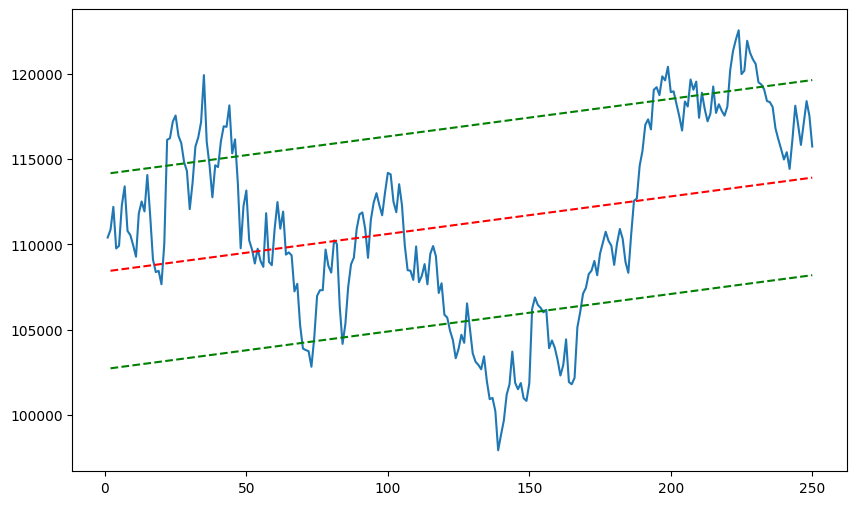

In [23]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------

#Aqui definimos a partir de qual dia a linha de tendencia/regressao sera calculada
periodo=--1

#Aqui calculamos a linha de tendência/regressão do ativo pelo periodo
trend = np.polyval(reg, data_pd['time'][periodo:])

#Aqui calculamos o desvio padrão
std = data_pd['Close'][periodo:].std()

#Aqui definimos as dimensões do gráfico a ser plotado
plt.figure(figsize = (10,6))

#Aqui plotamos o grafico
plt.plot(data_pd['time'], data_pd['Close'], label = nome_do_indice_ou_acao)

#Aqui plotamos a linha de tendencia/regressao, em vermelho
plt.plot(data_pd['time'][periodo:],trend, 'r--')

#Aqui plotamos a linha do desvio padrão em relação à linha de tendência
plt.plot(data_pd['time'][periodo:],trend-std, 'g--')
plt.plot(data_pd['time'][periodo:],trend+std, 'g--')

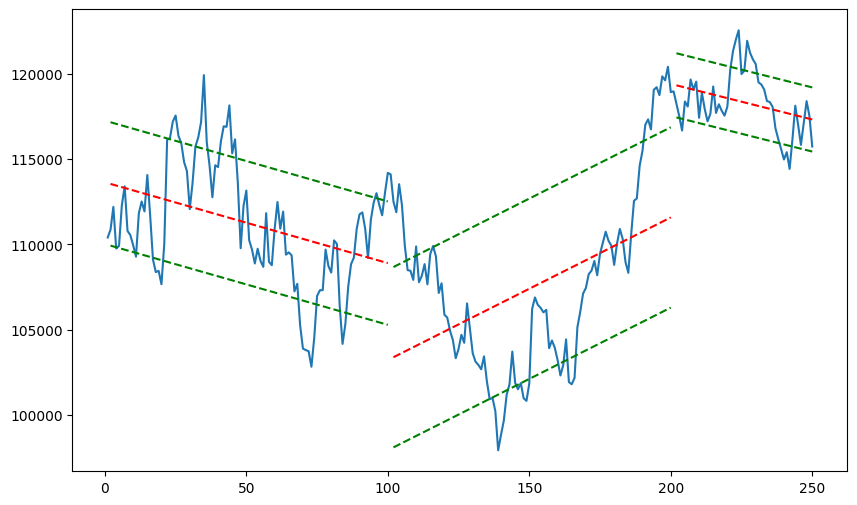

In [24]:
### ------------------------------------------------------------------------------------------------------
### Este notebook ilustra um artigo escrito no http://medium.com/productmanagerslife, por Christian Zambra
### ------------------------------------------------------------------------------------------------------

#Aqui pegamos o mesmo gráfico, calculando tendencia/regressao e Desvio em intervalos distintos

ini_01 = 1
fim_01 = 100
ini_02 = fim_01+1
fim_02 = 200
ini_03 = fim_02+1
fim_03 = 250


plt.figure(figsize = (10,6))
plt.plot(data_pd['time'], data_pd['Close'], label = nome_do_indice_ou_acao)


reg_01 = np.polyfit(data_pd['time'][ini_01:fim_01], data_pd['Close'][ini_01:fim_01], deg = 1)
trend_01 = np.polyval(reg_01, data_pd['time'][ini_01:fim_01])
std_01 = data_pd['Close'][ini_01:fim_01].std()
plt.plot(data_pd['time'][ini_01:fim_01],trend_01, 'r--')
plt.plot(data_pd['time'][ini_01:fim_01],trend_01-std_01, 'g--')
plt.plot(data_pd['time'][ini_01:fim_01],trend_01+std_01, 'g--')

reg_02 = np.polyfit(data_pd['time'][ini_02:fim_02], data_pd['Close'][ini_02:fim_02], deg = 1)
trend_02 = np.polyval(reg_02, data_pd['time'][ini_02:fim_02])
std_02 = data_pd['Close'][ini_02:fim_02].std()
plt.plot(data_pd['time'][ini_02:fim_02],trend_02, 'r--')
plt.plot(data_pd['time'][ini_02:fim_02],trend_02-std_02, 'g--')
plt.plot(data_pd['time'][ini_02:fim_02],trend_02+std_02, 'g--')

reg_03 = np.polyfit(data_pd['time'][ini_03:fim_03], data_pd['Close'][ini_03:fim_03], deg = 1)
trend_03 = np.polyval(reg_03, data_pd['time'][ini_03:fim_03])
std_03 = data_pd['Close'][ini_03:fim_03].std()
plt.plot(data_pd['time'][ini_03:fim_03],trend_03, 'r--')
plt.plot(data_pd['time'][ini_03:fim_03],trend_03-std_03, 'g--')
plt.plot(data_pd['time'][ini_03:fim_03],trend_03+std_03, 'g--')